In [113]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy
import pandas as pd
import seaborn as sns
%matplotlib inline
np.random.seed(420)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


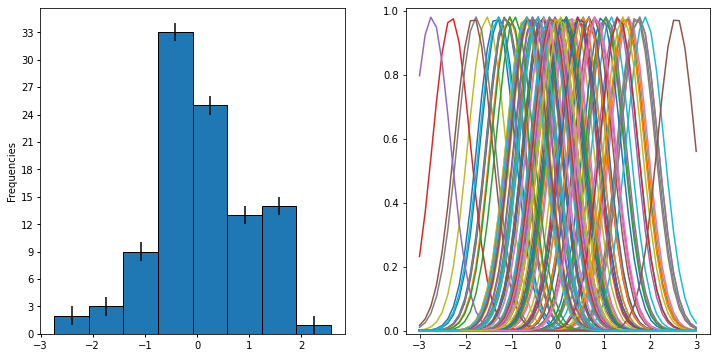

In [75]:
N = 100
x = npr.randn(N)
y, binEdges = np.histogram(x, bins=8)
binCenters = 0.5*(binEdges[:-1]+binEdges[1:])
w = binCenters[1]-binCenters[0]

fig, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
ax.set_ylabel('Frequencies')
ax.tick_params(which='major', width=1.0, length=3)
ax.yaxis.set_major_locator(MultipleLocator(3))
ax.bar(binCenters,y,yerr=1,width=w,edgecolor='black')

arr = np.linspace(-3,3)
f = [scipy.stats.norm.pdf(arr,loc=mu,scale=1.06*x.std()*x.shape[0]**(-1/5)) for mu in x]

ax1.set_ylim([-0.01,1.01])
for plot in f:
    ax1.plot(arr,plot)
plt.show()

99.53378023921833
100.00000000000001


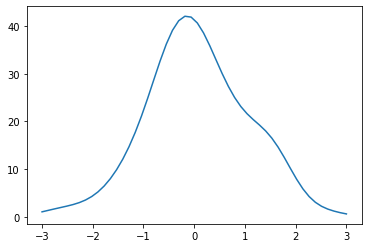

In [97]:
a = np.sum(f, axis=0)
integral = scipy.integrate.trapz(a, arr)
ori = y.sum()
print(integral)
a = a*ori/integral
plt.plot(arr,a)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

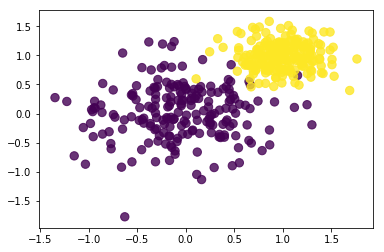

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

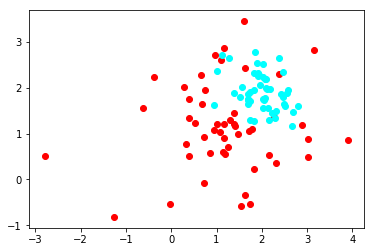

In [102]:
size = 50
def create_dataset(*args):
    n = len(args)
    assert n%2 == 0, 'Not enough mean-std couples'
    n = int(n/2)
    means = []
    stds = []
    for mean, std in zip(args[0::2], args[1::2]):
        means.append(mean)
        stds.append(std)
    data = np.array([]).reshape(0,2)
    classes = np.array([])
    for i in range(n):
        x1 = np.column_stack((npr.normal(loc=means[i], scale=stds[i], size=50),
                              npr.normal(loc=means[i], scale=stds[i], size=50)))
        data = np.concatenate((data, x1))
        classes = np.concatenate((classes, np.array([i for j in range(size)])))
    return data, classes

mat, clax = create_dataset(1, 1, 2, 0.45)
colors = ['red', 'cyan']
for idx, cl in enumerate(np.unique(clax)):
    plt.scatter(mat[clax==cl, 0], mat[clax==cl, 1], color=colors[idx])

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [102]:
data = np.load("residuals_261.npy",allow_pickle=True).item()
df = pd.DataFrame(data)
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


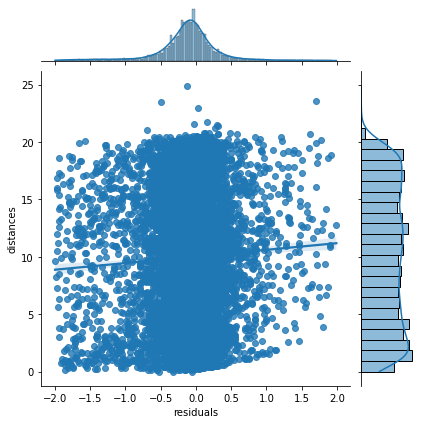

In [116]:
df = df[np.abs(df["residuals"]) < 2]
regression = scipy.stats.linregress(df["residuals"], df["distances"])
sns.jointplot(data=df, x="residuals", y="distances", kind="reg")